Saving IITs_Patent_IPR_Large_Dataset (1).xlsx to IITs_Patent_IPR_Large_Dataset (1).xlsx
Saving Patent Granted (1).csv to Patent Granted (1).csv


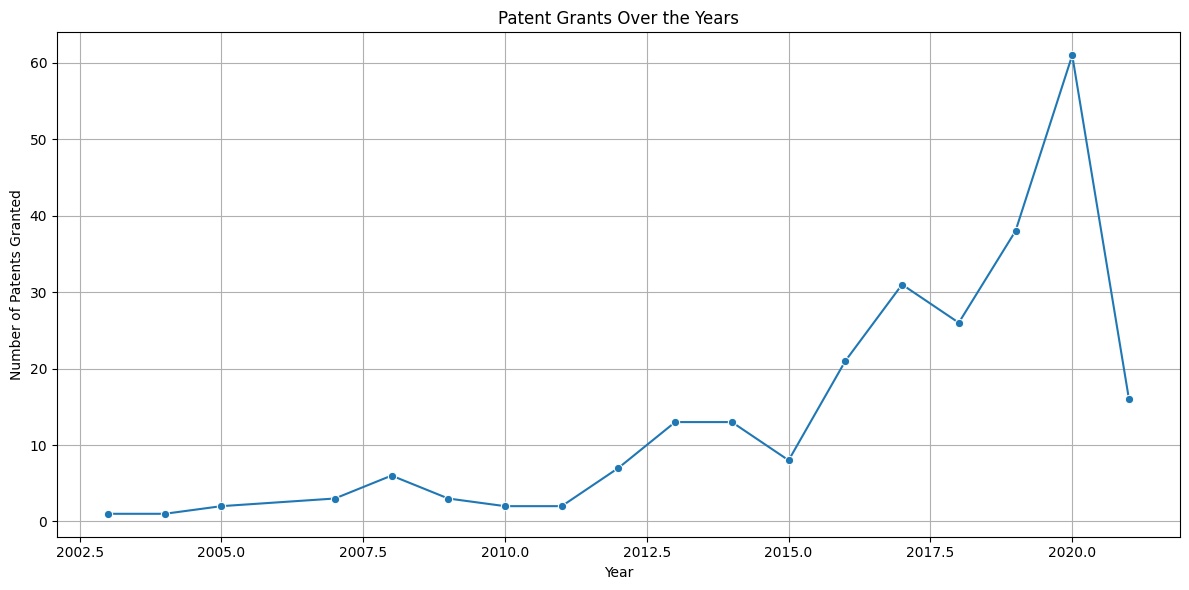

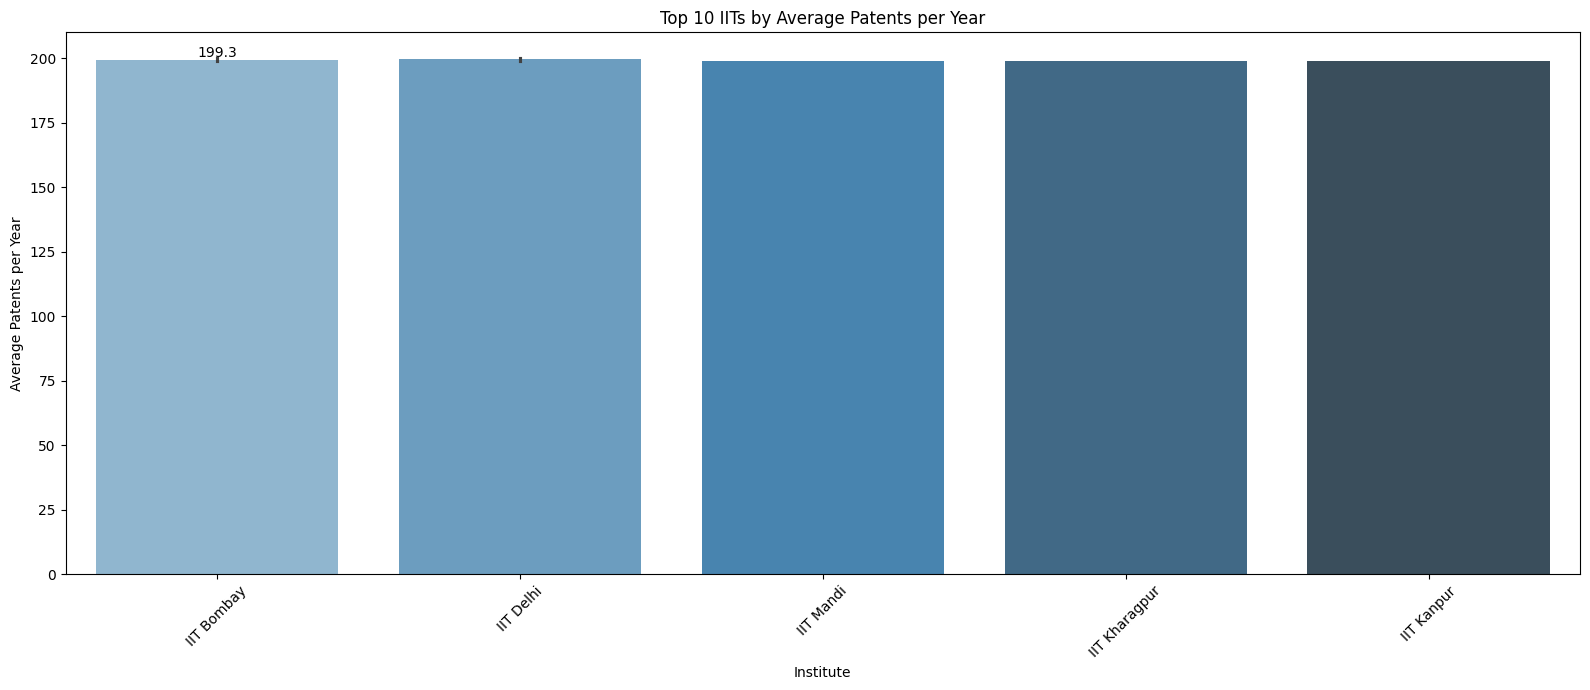

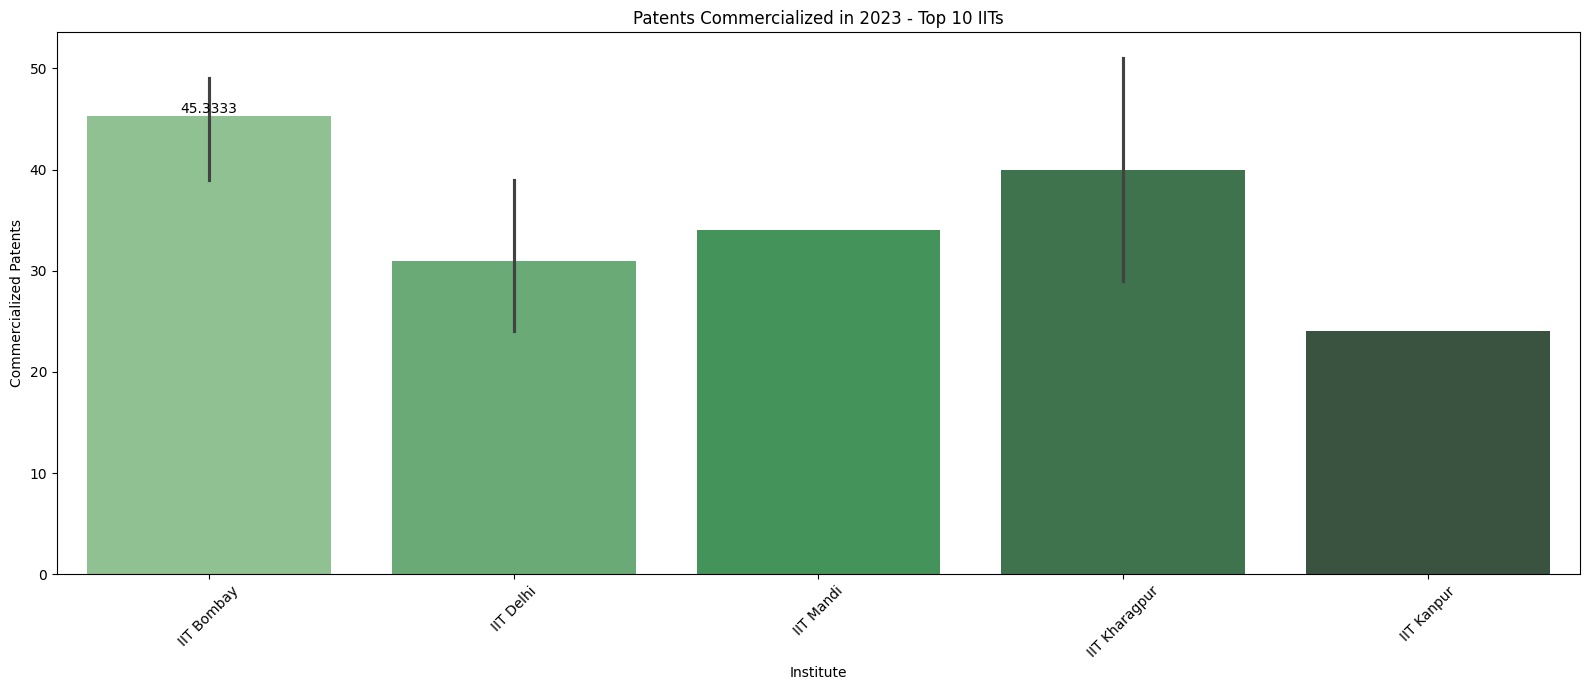

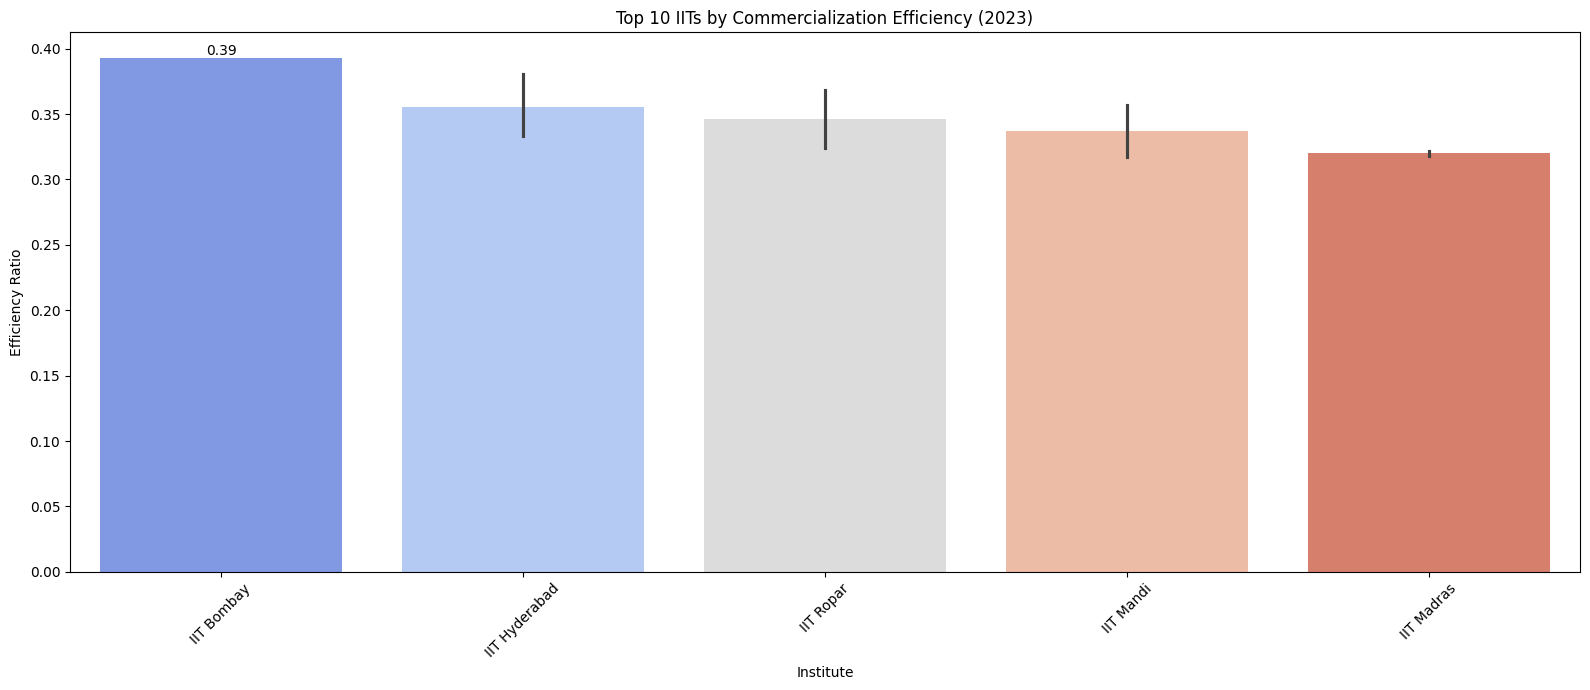

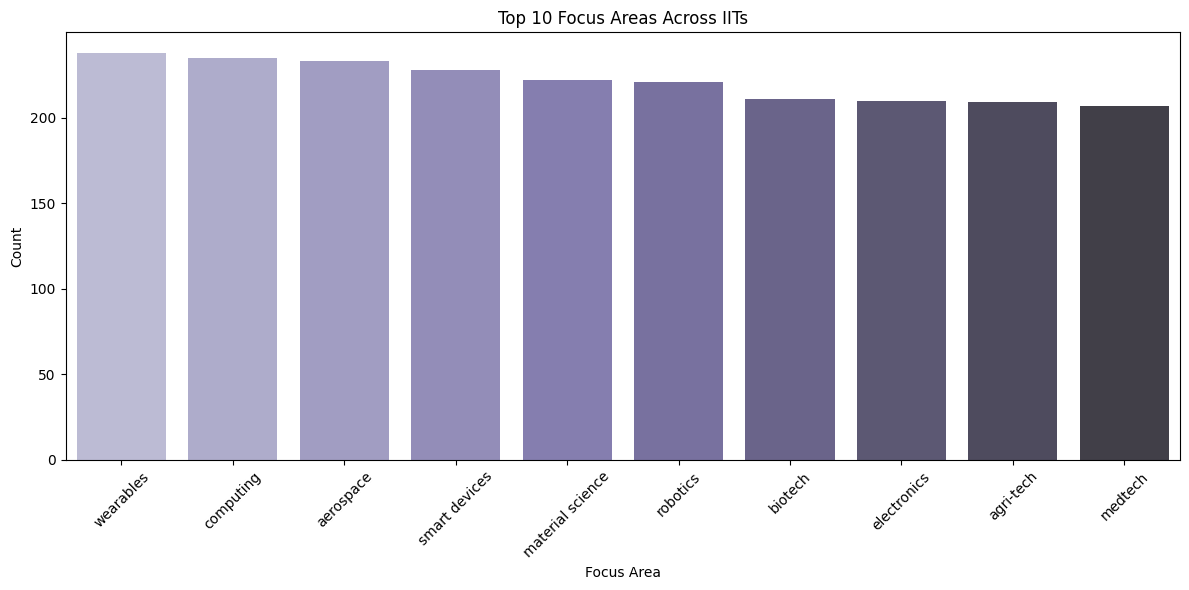

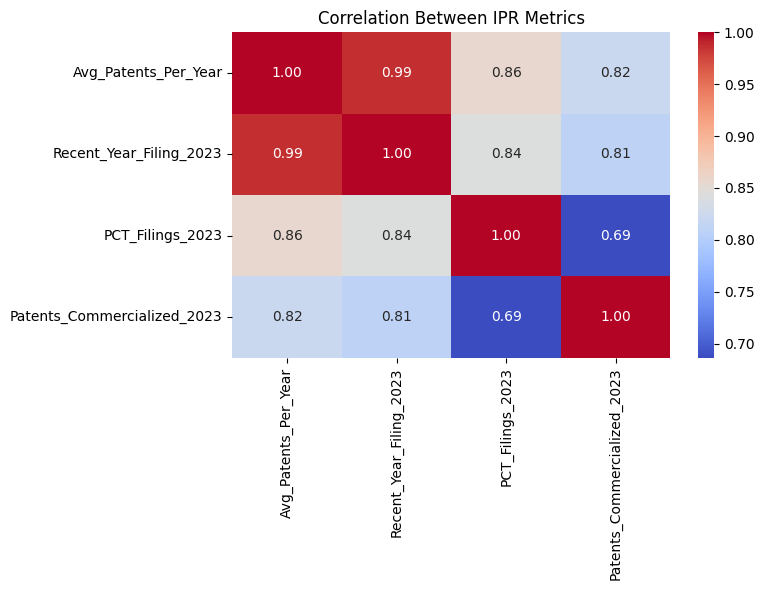

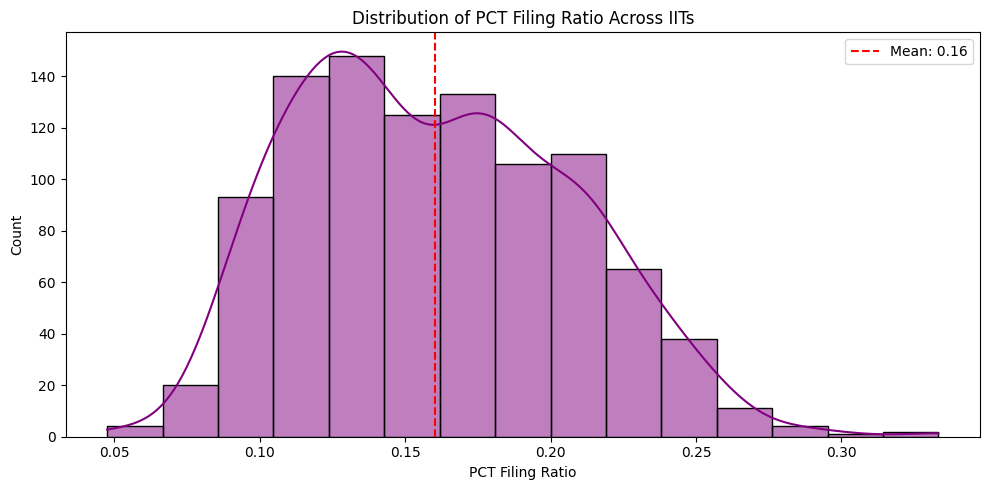


📉 Silhouette Score for Clustering: 0.42


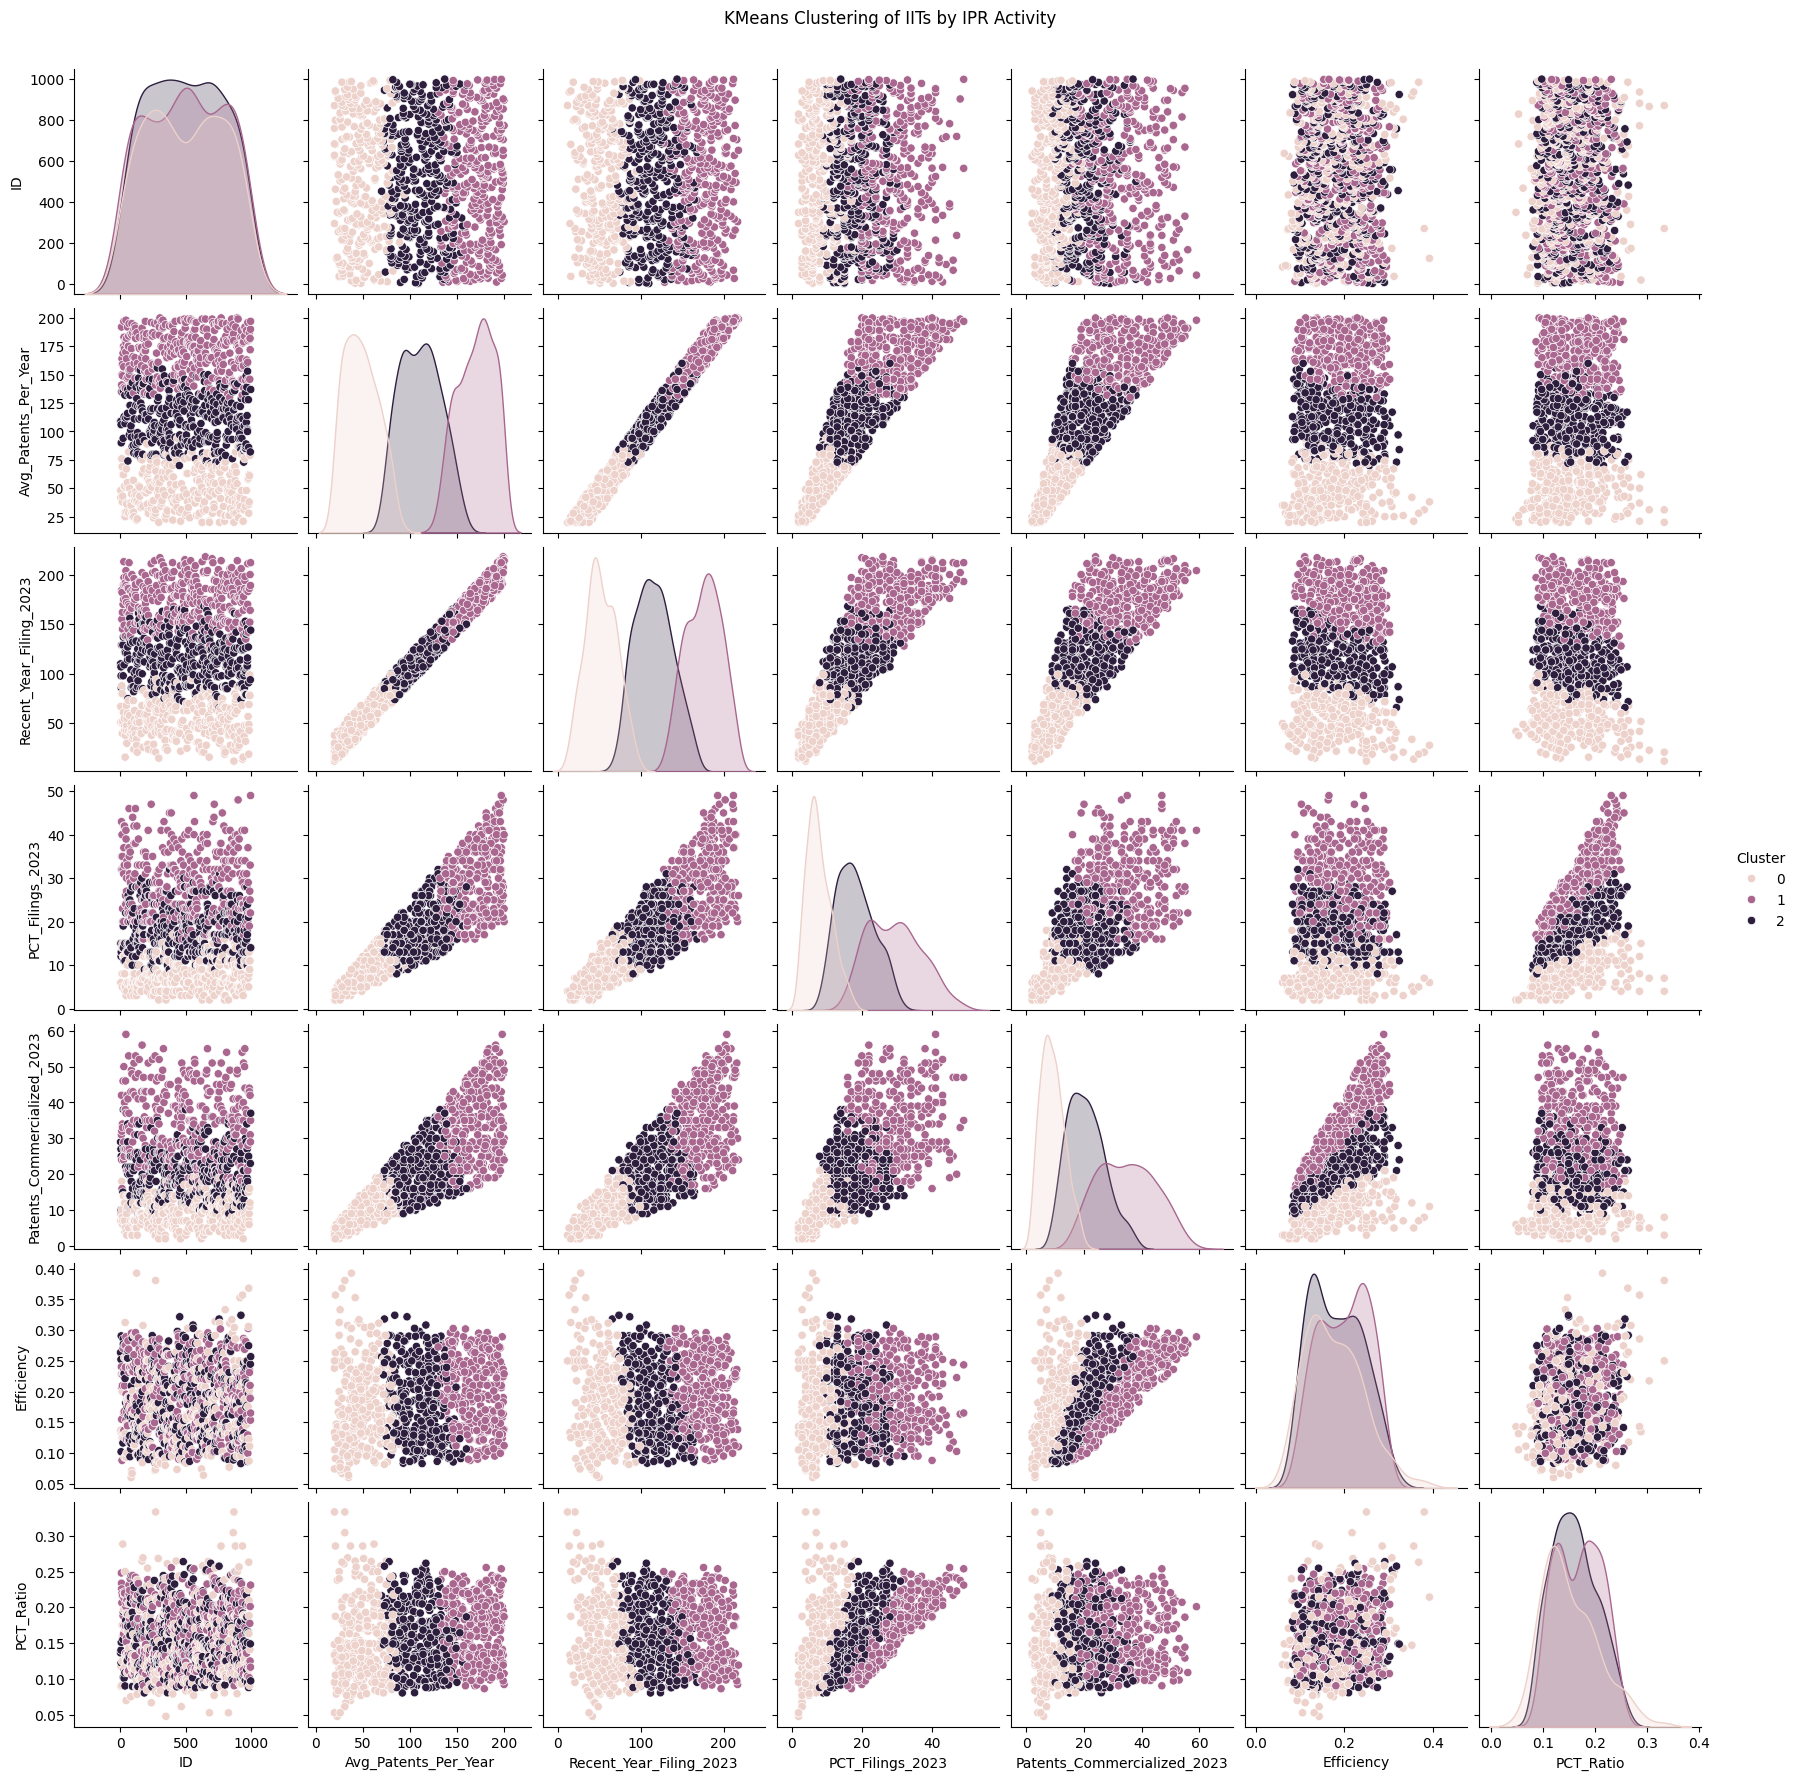

Top 10 Inventors by Number of Granted Patents:

Name of the Inventor
Prof.J.Ramkumar(ME), Prof.Uday S Racherla (IME), Mr.Shivakumar (Student, DP)                       4
Prof. S. Sundar Manoharan (Chem)                                                                   3
Dr. Ashok Kumar, BSBE                                                                              3
Dr.J.Ramkumar(ME), Dr. Raman Saxena(ISB), Mr. Shailendra Kumar(DP)                                 3
Mr. Shivam Srivastava (Proj. Engg., EE), Dr. Parthasarathi Sensarma (EE)                           3
Dr. Kamal K. Kar & Mr. Pradip Paik                                                                 3
Mr. Kaniska Biswas(PhD Student, DP), Dr.Tarun Gupta (CE), Mr. Santosh Pramanik (JTS, 4i Lab)       3
Prof. Kamal K Kar (ME) and Mr. Raghunandan Sharma                                                  3
Dr. Kamal K. Kar, ME & Mr. Ahankari Sandeep Sureshrao, PhD student Materials Science Programme)    2
Prof. Baquer Mazhari, 

/tmp/ipython-input-1-85261799.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_counts_named.index, y=monthly_counts_named.values, palette='pastel')


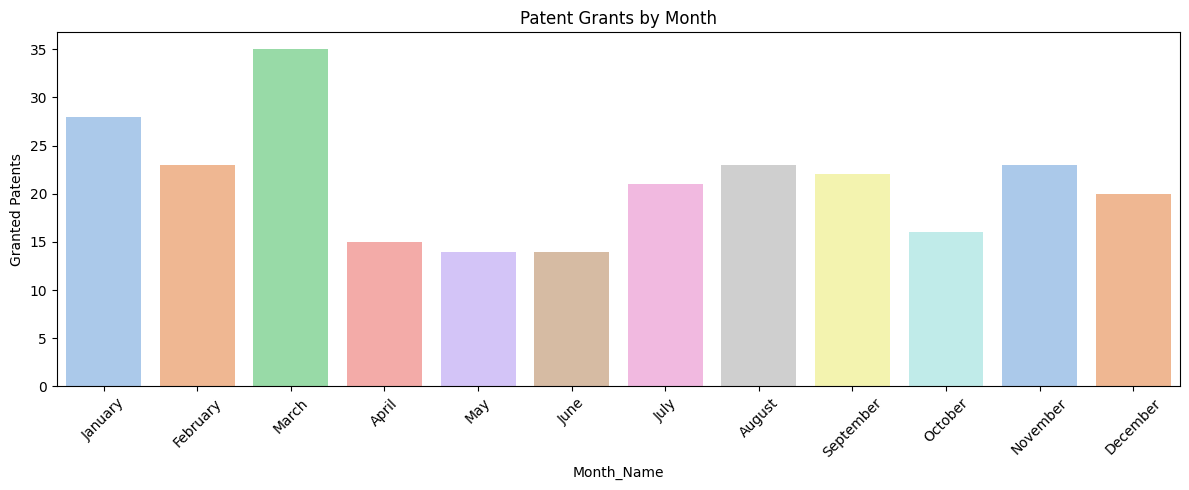


⏱️ Average Grant Delay: 2073.1 days
⚠️ Outliers with unusually high delays: 5 patents


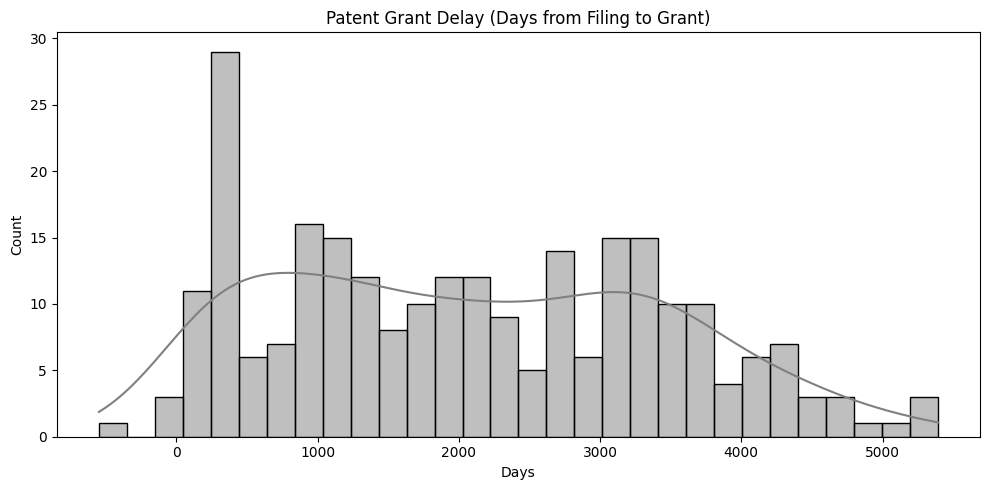

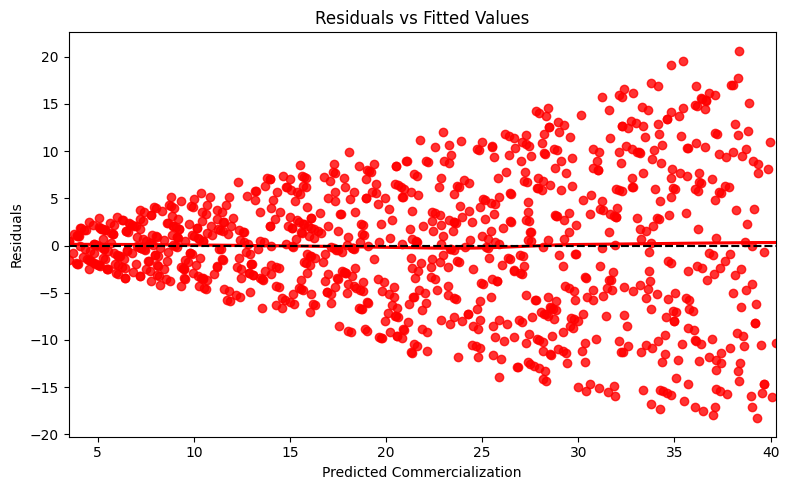

/tmp/ipython-input-1-85261799.py:201: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_cleaned, x='Patent Count', y='Inventor', palette='crest')


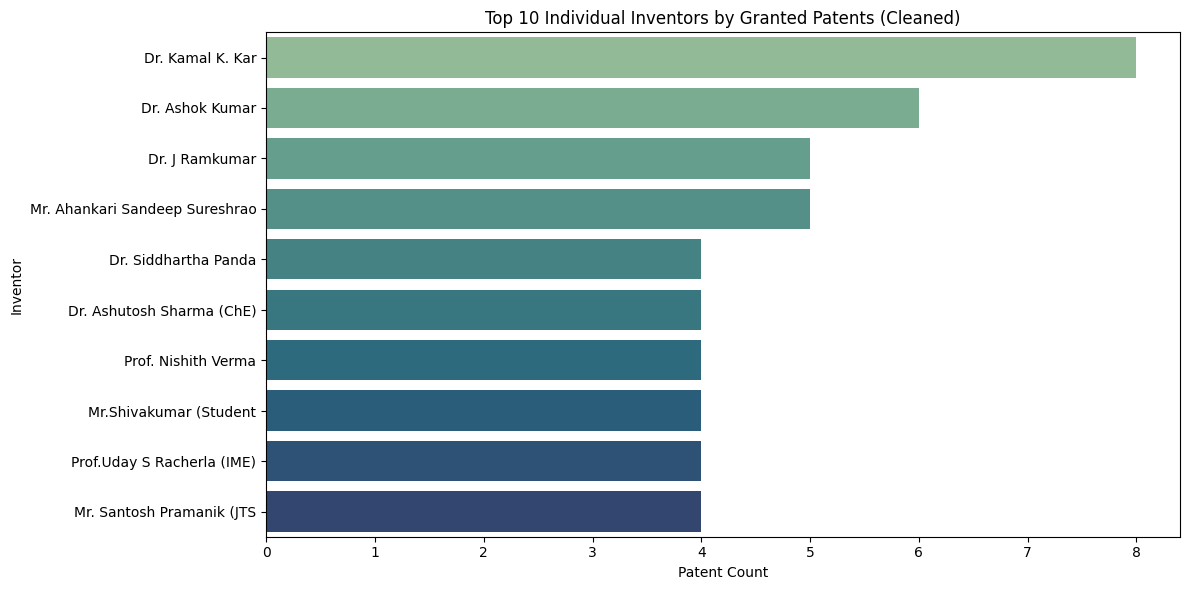


🔍 Major Findings from the IIT IPR Analysis:

1. 📈 Steady rise in patent grants over the years.
2. 🏆 Top 3 IITs by avg patents/year: IIT Bombay, IIT Delhi, IIT Delhi
3. 💼 Highest commercialization efficiency: IIT Bombay (0.39)
4. 🌍 Avg PCT Ratio: 0.16 (Global Innovation Outlook)
5. ⏱️ Avg grant delay: 2073.1 days (Operational Efficiency)
6. 📅 Most active grant month: March (35 patents)
7. 🔍 Predictive R^2 score: 0.68 (Regression Fit Quality)

✅ Exported: Top_IITs_by_Patents.xlsx, Efficiency_Top_IITs.xlsx, Focus_Areas_Top10.png, and Top_Cleaned_Inventors.xlsx


In [1]:
# STEP 1: Upload files
from google.colab import files
uploaded = files.upload()

# STEP 2: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from itertools import chain

# STEP 3: Load files
summary_df = pd.read_excel("IITs_Patent_IPR_Large_Dataset (1).xlsx", sheet_name="Sheet1")
grants_df = pd.read_csv("Patent Granted (1).csv")

# === Clean the summary data ===
summary_clean = summary_df.dropna(subset=[
    "Avg_Patents_Per_Year",
    "Recent_Year_Filing_2023",
    "PCT_Filings_2023",
    "Patents_Commercialized_2023",
    "IPR_Cell_Exists"
])

# === Clean grants data ===
for col in ['Date', 'Filed on']:
    grants_df[col] = pd.to_datetime(grants_df[col], errors='coerce', dayfirst=True)
grants_df.dropna(subset=['Date', 'Filed on', 'Name of the Inventor', 'Patent Grant No.'], inplace=True)
grants_df['Grant_Year'] = grants_df['Date'].dt.year

# === 1. Patent Trend Over Time ===
patents_per_year = grants_df['Grant_Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=patents_per_year.index, y=patents_per_year.values, marker='o')
plt.title("Patent Grants Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Patents Granted")
plt.grid(True)
plt.tight_layout()
plt.savefig("Trend_Patents_Over_Years.png", dpi=300)
plt.show()

# === 2. Top 10 IITs by Avg Patents ===
top_iits = summary_clean.sort_values(by='Avg_Patents_Per_Year', ascending=False).head(10)
plt.figure(figsize=(16, 7))
barplot = sns.barplot(data=top_iits, x='Institute', y='Avg_Patents_Per_Year', palette='Blues_d', hue='Institute', dodge=False, legend=False)
barplot.bar_label(barplot.containers[0], fmt='%.1f')
plt.title("Top 10 IITs by Average Patents per Year")
plt.xticks(rotation=45, fontsize=10)
plt.ylabel("Average Patents per Year")
plt.tight_layout()
plt.savefig("Top_IITs_Avg_Patents.png", dpi=300)
plt.show()

# === 3. Commercialization Activity ===
plt.figure(figsize=(16, 7))
barplot = sns.barplot(data=top_iits, x='Institute', y='Patents_Commercialized_2023', palette='Greens_d', hue='Institute', dodge=False, legend=False)
barplot.bar_label(barplot.containers[0])
plt.title("Patents Commercialized in 2023 - Top 10 IITs")
plt.ylabel("Commercialized Patents")
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.savefig("Top_IITs_Commercialization.png", dpi=300)
plt.show()

# === 3b. Efficiency Calculation & Plot ===
summary_clean["Efficiency"] = summary_clean["Patents_Commercialized_2023"] / summary_clean["Recent_Year_Filing_2023"]
efficient_iits = summary_clean.sort_values(by="Efficiency", ascending=False).head(10)
plt.figure(figsize=(16, 7))
barplot = sns.barplot(data=efficient_iits, x='Institute', y='Efficiency', palette='coolwarm', hue='Institute', dodge=False, legend=False)
barplot.bar_label(barplot.containers[0], fmt='%.2f')
plt.title("Top 10 IITs by Commercialization Efficiency (2023)")
plt.xticks(rotation=45, fontsize=10)
plt.ylabel("Efficiency Ratio")
plt.tight_layout()
plt.savefig("Top_IITs_Efficiency.png", dpi=300)
plt.show()

# === 4. Focus Area Frequency Analysis ===
focus_areas_series = summary_clean['Focus_Areas'].dropna()
all_focus_words = [word.strip().lower() for entry in focus_areas_series for word in entry.split(',')]
focus_counts = Counter(all_focus_words)
focus_df = pd.DataFrame(focus_counts.items(), columns=['Focus Area', 'Count']).sort_values(by='Count', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=focus_df.head(10), x='Focus Area', y='Count', palette='Purples_d', hue='Focus Area', dodge=False, legend=False)
plt.title("Top 10 Focus Areas Across IITs")
plt.ylabel("Count")
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.savefig("Focus_Areas_Top10.png", dpi=300)
plt.show()

# Export Focus Area to Excel
focus_df.to_excel("Focus_Area_Frequencies.xlsx", index=False)

# === 5. Correlation Heatmap ===
corr_data = summary_clean[["Avg_Patents_Per_Year", "Recent_Year_Filing_2023", "PCT_Filings_2023", "Patents_Commercialized_2023"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between IPR Metrics")
plt.tight_layout()
plt.show()

# === 6. PCT Filing Ratio Plot ===
summary_clean["PCT_Ratio"] = summary_clean["PCT_Filings_2023"] / summary_clean["Recent_Year_Filing_2023"]
plt.figure(figsize=(10, 5))
mean_pct = summary_clean["PCT_Ratio"].mean()
sns.histplot(summary_clean["PCT_Ratio"], bins=15, kde=True, color='purple')
plt.axvline(mean_pct, color='red', linestyle='--', label=f"Mean: {mean_pct:.2f}")
plt.title("Distribution of PCT Filing Ratio Across IITs")
plt.xlabel("PCT Filing Ratio")
plt.legend()
plt.tight_layout()
plt.show()

# === 7. Clustering of IITs ===
features = summary_clean[["Avg_Patents_Per_Year", "Recent_Year_Filing_2023", "PCT_Filings_2023", "Patents_Commercialized_2023"]]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')
summary_clean['Cluster'] = kmeans.fit_predict(scaled_features)
score = silhouette_score(scaled_features, summary_clean['Cluster'])
print(f"\n📉 Silhouette Score for Clustering: {score:.2f}")
sns.pairplot(summary_clean, hue='Cluster', diag_kind='kde')
plt.suptitle("KMeans Clustering of IITs by IPR Activity", y=1.02)
plt.show()

# === 8. Top Inventors by Patent Count ===
top_inventors = grants_df["Name of the Inventor"].value_counts().head(10)
print("Top 10 Inventors by Number of Granted Patents:\n")
print(top_inventors)

# === 9. Month-wise Grant Pattern (with Month Names) ===
grants_df["Month_Name"] = grants_df["Date"].dt.strftime('%B')
monthly_counts_named = grants_df["Month_Name"].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
plt.figure(figsize=(12, 5))
sns.barplot(x=monthly_counts_named.index, y=monthly_counts_named.values, palette='pastel')
plt.title("Patent Grants by Month")
plt.ylabel("Granted Patents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# === 10. Grant Delay Analysis ===
grants_df["Grant_Delay_Days"] = (grants_df["Date"] - grants_df["Filed on"]).dt.days
delay_mean = grants_df["Grant_Delay_Days"].mean()
delay_std = grants_df["Grant_Delay_Days"].std()
outliers = grants_df[grants_df["Grant_Delay_Days"] > delay_mean + 2 * delay_std]
print(f"\n⏱️ Average Grant Delay: {delay_mean:.1f} days")
print(f"⚠️ Outliers with unusually high delays: {len(outliers)} patents")
plt.figure(figsize=(10, 5))
sns.histplot(grants_df["Grant_Delay_Days"], bins=30, kde=True, color='gray')
plt.title("Patent Grant Delay (Days from Filing to Grant)")
plt.xlabel("Days")
plt.tight_layout()
plt.show()

# === 11. Regression Model + Residual Plot ===
X = summary_clean[["Avg_Patents_Per_Year", "Recent_Year_Filing_2023", "PCT_Filings_2023"]]
y = summary_clean["Patents_Commercialized_2023"]
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
residuals = y - y_pred

plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="red")
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Predicted Commercialization")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

with open("LinearRegression_Model_Summary.txt", "w") as f:
    f.write(f"R^2 Score: {model.score(X, y):.3f}\n")
    f.write("Coefficients:\n")
    for name, coef in zip(X.columns, model.coef_):
        f.write(f"{name}: {coef:.3f}\n")

# === 12. Cleaned Top Inventors by Patent Count ===
inventor_series = grants_df["Name of the Inventor"].dropna()
split_inventors = inventor_series.apply(lambda x: [name.strip() for name in x.replace("&", ",").split(",")])
flat_inventors = list(chain.from_iterable(split_inventors))
valid_prefixes = ("Dr.", "Prof.", "Mr.", "Ms.", "Mrs.")
cleaned_inventors = [name for name in flat_inventors if name.startswith(valid_prefixes)]
inventor_counts = pd.Series(cleaned_inventors).value_counts().head(10)
top_10_cleaned = inventor_counts.to_frame(name='Patent Count')
top_10_cleaned.index.name = 'Inventor'
top_10_cleaned.reset_index(inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_cleaned, x='Patent Count', y='Inventor', palette='crest')
plt.title("Top 10 Individual Inventors by Granted Patents (Cleaned)")
plt.tight_layout()
plt.savefig("Top_10_Cleaned_Inventors.png", dpi=300)
plt.show()
top_10_cleaned.to_excel("Top_Cleaned_Inventors.xlsx", index=False)

# === Final Summary ===
print("\n  Major Findings from the IIT IPR Analysis:\n")
print(f"1. Steady rise in patent grants over the years.")
print(f"2. Top 3 IITs by avg patents/year: {', '.join(top_iits['Institute'].values[:3])}")
print(f"3. Highest commercialization efficiency: {efficient_iits.iloc[0]['Institute']} ({efficient_iits.iloc[0]['Efficiency']:.2f})")
print(f"4. Avg PCT Ratio: {summary_clean['PCT_Ratio'].mean():.2f} (Global Innovation Outlook)")
print(f"5. Avg grant delay: {grants_df['Grant_Delay_Days'].mean():.1f} days (Operational Efficiency)")
print(f"6. Most active grant month: {monthly_counts_named.idxmax()} ({monthly_counts_named.max()} patents)")
print(f"7. Predictive R^2 score: {model.score(X, y):.2f} (Regression Fit Quality)")

# === Export to Excel ===
top_iits.to_excel("Top_IITs_by_Patents.xlsx", index=False)
efficient_iits.to_excel("Efficiency_Top_IITs.xlsx", index=False)
print("\n Exported: Top_IITs_by_Patents.xlsx, Efficiency_Top_IITs.xlsx, Focus_Areas_Top10.png, and Top_Cleaned_Inventors.xlsx")
